# 算法原理

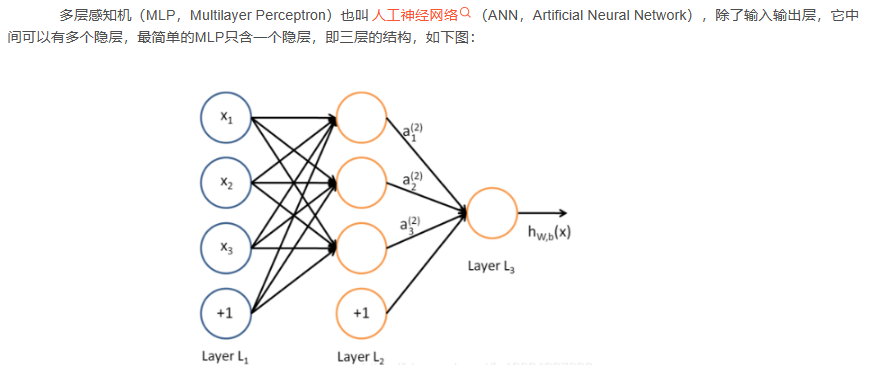

# 数据准备

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # 多层感知机
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

In [2]:
#读取数据
data = pd.read_csv("../data/iris.csv")
print(data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
#准备数据
data = data.dropna()
y = data['Species'].apply(lambda x: 1 if x == 'setosa' else 2 if x == 'versicolor' else 3)
x = data.drop(['Species'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [4]:
# 分类模型、参数
model = MLPClassifier(solver='adam', random_state=0, activation='tanh', alpha=0.001, max_iter=1000, learning_rate='adaptive')
param_grid = {'hidden_layer_sizes': [[10,10], [50,50], [100,100]]}

# GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(model, param_grid)
model = gsearch.fit(x_train, y_train)

# 打印最优结果
print('DecisionTree params:', model.best_estimator_)

DecisionTree params: MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=[10, 10],
              learning_rate='adaptive', max_iter=1000, random_state=0)


# 模型保存

In [10]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../test/best_models/mlp.pkl')

# 加载模型
model = joblib.load('../test/best_models/mlp.pkl')

In [11]:
# 法二
import pickle

with open('../test/best_models/mlp.pkl', 'wb') as f:
    pickle.dump(model, f)
 
#读取Model
with open('../test/best_models/mlp.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [12]:
prediction = model.predict(x_test)

In [13]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 1.0


In [14]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

